# NFL Combine Classification Modeling

## Exploratory Data Analysis

## Project Goals

- Determine the influence the NFL Combine has on a prospect's draft status (getting drafted or not).
- Reveal how much the NFL Combine factors in on a prospect's draft value (how early or how late a prospect gets drafted, if at all).
- Discover which NFL Combine drills have the most impact on a prospect's draft position.

## Summary of Data

The dataset that was analyzed for this study contains 9,972 observations of NFL Combine and NFL Draft data, dating from 1987-2017.

### Library Import

In [25]:
#Import libraries
%run ../python_files/libraries
%matplotlib inline

## Data Importing, Data Merging, Data Cleaning, and Data Examination

In [3]:
# import NFL Combine and NFL Draft data
nfl_combine_df = pd.read_csv('../data/nfl_combine_data.csv')
nfl_draft_df = pd.read_csv('../data/nfl_draft_data.csv')

# quick overview of the NFL Combine dataset
nfl_combine_df

,full_name,first_name,last_name,combine_year,college,position,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle
0,jamal_adams,jamal,adams,2017,louisiana_state,db,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,NaN
1,montravius_adams,montravius,adams,2017,auburn,dl,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,NaN
2,rodney_adams,rodney,adams,2017,south_florida,wr,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,11.39
3,quincy_adeboyejo,quincy,adeboyejo,2017,mississippi,wr,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,NaN
4,brian_allen,brian,allen,2017,utah,db,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,rod_woodson,rod,woodson,1987,purdue,lb,72.00,202,10.50,31.00,4.33,10.0,36.0,125.0,NaN,3.98,10.92
9946,john_wooldridge,john,wooldridge,1987,ohio_state,rb,68.40,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9947,david_wyman,david,wyman,1987,stanford,lb,74.00,235,9.50,31.25,4.79,23.0,29.0,118.0,NaN,4.30,11.78
9948,theo_young,theo,young,1987,arkansas,fb_te,74.00,231,9.00,34.00,4.89,9.0,30.0,107.0,NaN,4.20,11.71


In [4]:
# quick overview of the NFL Draft dataset
nfl_draft_df

,full_name,first_name,last_name,combine_year,round,pick,team
0,jameis_winston,jameis,winston,2015,1,1,tb
1,marcus_mariota,marcus,mariota,2015,1,2,ten
2,dante_fowler,dante,fowler,2015,1,3,jax
3,amari_cooper,amari,cooper,2015,1,4,oak
4,brandon_scherff,brandon,scherff,2015,1,5,was
...,...,...,...,...,...,...,...
8174,xavier_woods,xavier,woods,2017,6,191,dal
8175,zach_banner,zach,banner,2017,4,137,ind
8176,zach_cunningham,zach,cunningham,2017,2,57,hou
8177,zane_gonzalez,zane,gonzalez,2017,7,224,cle


In [5]:
# merge the NFL Combine and NFL Draft datasets with an outer join so that all values and rows are retained
nfl_df = pd.merge(nfl_combine_df, nfl_draft_df, how = 'left', on = ['full_name', 'last_name', 'first_name', 'combine_year'])

# impute round and pick values to reflect undrafted players. round '13' means undrafted (draft lasts only 12 rounds)
# and pick '337' means undrafted (only 336 players get drafted). 'udfa' means no team drafted the players, therefore
# making them undrafted free agents (udfa).
nfl_df['round'].fillna('13', inplace=True)
nfl_df['pick'].fillna('337', inplace=True)
nfl_df['team'].fillna('udfa', inplace=True)

# change round and pick variables to integer values
nfl_df['round'] = nfl_df['round'].astype(int)
nfl_df['pick'] = nfl_df['pick'].astype(int)

# quick overview of nfl_df dataset
nfl_df

,full_name,first_name,last_name,combine_year,college,position,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,round,pick,team
0,jamal_adams,jamal,adams,2017,louisiana_state,db,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,NaN,1,6,nyj
1,montravius_adams,montravius,adams,2017,auburn,dl,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,NaN,3,93,gb
2,rodney_adams,rodney,adams,2017,south_florida,wr,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,11.39,5,170,min
3,quincy_adeboyejo,quincy,adeboyejo,2017,mississippi,wr,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,NaN,13,337,udfa
4,brian_allen,brian,allen,2017,utah,db,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,NaN,5,173,pit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,rod_woodson,rod,woodson,1987,purdue,lb,72.00,202,10.50,31.00,4.33,10.0,36.0,125.0,NaN,3.98,10.92,1,10,pit
9968,john_wooldridge,john,wooldridge,1987,ohio_state,rb,68.40,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,337,udfa
9969,david_wyman,david,wyman,1987,stanford,lb,74.00,235,9.50,31.25,4.79,23.0,29.0,118.0,NaN,4.30,11.78,2,45,sea
9970,theo_young,theo,young,1987,arkansas,fb_te,74.00,231,9.00,34.00,4.89,9.0,30.0,107.0,NaN,4.20,11.71,12,317,pit


In [6]:
# quick review of the variables in the NFL merged dataset
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9971
Data columns (total 20 columns):
full_name               9972 non-null object
first_name              9972 non-null object
last_name               9972 non-null object
combine_year            9972 non-null int64
college                 9972 non-null object
position                9972 non-null object
height_inches           9972 non-null float64
weight_lbs              9972 non-null int64
hand_size_inches        8422 non-null float64
arm_length_inches       8104 non-null float64
40_yard_dash            9092 non-null float64
bench_press_reps        6792 non-null float64
vertical_leap_inches    8069 non-null float64
broad_jump_inches       7921 non-null float64
3_cone_drill            4521 non-null float64
20_yard_shuttle         7191 non-null float64
60_yard_shuttle         3177 non-null float64
round                   9972 non-null int64
pick                    9972 non-null int64
team                    9972 non

In [7]:
# quick review of the characteristics of the feature variables in the dataset
nfl_df.describe()

,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,round,pick
count,9972.000000,9972.000000,9972.000000,8422.000000,8104.000000,9092.000000,6792.000000,8069.000000,7921.000000,4521.000000,7191.000000,3177.000000,9972.000000,9972.000000
mean,2002.190533,73.735322,240.251103,9.528544,32.221266,4.830313,19.832155,32.008489,112.323065,7.345895,4.403406,11.674328,7.645006,204.138087
std,9.301371,2.644132,45.019225,0.629227,1.497930,0.309724,6.538387,4.203464,9.307325,0.446682,0.268807,0.425468,4.644641,120.865945
min,1987.000000,64.900000,142.000000,7.130000,25.630000,4.210000,1.000000,17.500000,7.000000,6.340000,3.730000,10.430000,1.000000,1.000000
25%,1994.000000,71.880000,203.000000,9.130000,31.250000,4.590000,15.000000,29.000000,106.000000,7.010000,4.200000,11.380000,3.000000,92.000000
50%,2002.000000,74.000000,232.000000,9.500000,32.250000,4.760000,20.000000,32.000000,113.000000,7.260000,4.360000,11.650000,6.000000,198.000000
75%,2011.000000,75.750000,275.000000,10.000000,33.250000,5.040000,24.000000,35.000000,119.000000,7.620000,4.570000,11.930000,13.000000,337.000000
max,2017.000000,82.400000,387.000000,11.880000,38.500000,6.120000,51.000000,46.000000,147.000000,9.610000,5.680000,13.910000,13.000000,337.000000


In [8]:
# check the number of missing values in the NFL merged dataset
nfl_df.isna().sum()

full_name                  0
first_name                 0
last_name                  0
combine_year               0
college                    0
position                   0
height_inches              0
weight_lbs                 0
hand_size_inches        1550
arm_length_inches       1868
40_yard_dash             880
bench_press_reps        3180
vertical_leap_inches    1903
broad_jump_inches       2051
3_cone_drill            5451
20_yard_shuttle         2781
60_yard_shuttle         6795
round                      0
pick                       0
team                       0
dtype: int64

In [9]:
# players who attended the NFL combine and were drafted
# 6272 NFL combine attendees out of 9972 were drafted
nfl_combine_df[nfl_combine_df.full_name.isin(nfl_draft_df.full_name)]

,full_name,first_name,last_name,combine_year,college,position,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle
0,jamal_adams,jamal,adams,2017,louisiana_state,db,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,NaN
1,montravius_adams,montravius,adams,2017,auburn,dl,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,NaN
2,rodney_adams,rodney,adams,2017,south_florida,wr,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,11.39
4,brian_allen,brian,allen,2017,utah,db,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,NaN
5,jonathan_allen,jonathan,allen,2017,alabama,dl,74.63,286,9.38,33.63,5.00,21.0,30.0,108.0,7.49,4.44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,tony_woods,tony,woods,1987,pittsburgh,dl,74.80,249,10.00,34.00,4.85,18.0,29.0,115.0,NaN,4.55,11.82
9945,rod_woodson,rod,woodson,1987,purdue,lb,72.00,202,10.50,31.00,4.33,10.0,36.0,125.0,NaN,3.98,10.92
9947,david_wyman,david,wyman,1987,stanford,lb,74.00,235,9.50,31.25,4.79,23.0,29.0,118.0,NaN,4.30,11.78
9948,theo_young,theo,young,1987,arkansas,fb_te,74.00,231,9.00,34.00,4.89,9.0,30.0,107.0,NaN,4.20,11.71


In [10]:
# players who attended the NFL combine but did not get drafted
# 3678 NFL combine attendees out of 9972 went undrafted
nfl_combine_df[~nfl_combine_df.full_name.isin(nfl_draft_df.full_name)]

,full_name,first_name,last_name,combine_year,college,position,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle
3,quincy_adeboyejo,quincy,adeboyejo,2017,mississippi,wr,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,NaN
7,gavin_andrews,gavin,andrews,2017,oregon_state,ol,77.00,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.09,NaN
10,antony_auclair,antony,auclair,2017,laval,fb_te,78.00,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.45,12.08
11,erik_austell,erik,austell,2017,charleston_southern,ol,75.13,301,9.00,32.00,5.23,24.0,27.5,107.0,8.13,4.90,NaN
14,toby_baker,toby,baker,2017,arkansas,k_p,75.13,210,9.25,31.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,bobby_white,bobby,white,1987,penn_state,dl,74.30,246,10.25,32.25,4.87,18.0,26.0,109.0,NaN,4.41,NaN
9935,gerald_white,gerald,white,1987,michigan,fb_te,71.40,220,9.50,31.00,NaN,NaN,28.0,104.0,NaN,4.49,11.80
9940,perry_williams,perry,williams,1987,clemson,lb,73.00,203,8.00,30.50,4.67,8.0,29.0,103.0,NaN,4.21,11.48
9943,carl_woods,carl,woods,1987,vanderbilt,rb,71.00,198,9.75,30.50,4.60,11.0,27.5,106.0,NaN,4.19,11.82


In [11]:
# players who were drafted but did not attend the NFL combine
# 703 players did not attend the NFL combine and were still drafted
nfl_draft_df[~nfl_draft_df.last_name.isin(nfl_combine_df.last_name)]

,full_name,first_name,last_name,combine_year,round,pick,team
209,christian_ringo,christian,ringo,2015,6,210,gb
221,austin_reiter,austin,reiter,2015,7,222,was
245,geoff_swaim,geoff,swaim,2015,7,246,dal
250,taurean_nixon,taurean,nixon,2015,7,251,den
251,josh_furman,josh,furman,2015,7,252,den
...,...,...,...,...,...,...,...
7859,jimmy_landes,jimmy,landes,2016,6,210,det
7928,roberto_aguayo,roberto,aguayo,2016,2,59,tb
7998,chris_godwin,chris,godwin,2017,3,84,tb
7999,chris_wormley,chris,wormley,2017,3,74,bal


## Data Transformations



In [12]:
# created draft_status column. '1' means the player was drafted and '0' means the player was undrafted
nfl_df['draft_status'] = nfl_df['round'].astype(str).map({'1': 1, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1,
                                                          '8': 1, '9': 1, '10': 1, '11': 1, '12': 1, '13': 0})

# created draft_value column. '1' means the player was a Day 1 draft pick (selected in Round 1), '2' means the player
# was a Day 2 draft pick (selected in Rounds 2-3), '3' means the player was a Day 3 draft pick (selected in
# Rounds 4-7), '4' means the player was selected in Rounds 8-12 (the draft used to follow a 12 round format until
# 1993. 1993 draft was 8 rounds. 1994-present drafts are 7 rounds.), '5' means the player was undrafted.
nfl_df['draft_value'] = nfl_df['round'].astype(str).map({'1': 1, '2': 2, '3': 2, '4': 3, '5': 3, '6': 3, '7': 3,
                                                         '8': 4, '9': 4, '10': 4, '11': 4, '12': 4, '13': 5})

In [18]:
nfl_df

,full_name,first_name,last_name,combine_year,college,position,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,round,pick,team,draft_status,draft_value
0,jamal_adams,jamal,adams,2017,louisiana_state,db,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,NaN,1,6,nyj,1,1
1,montravius_adams,montravius,adams,2017,auburn,dl,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,NaN,3,93,gb,1,2
2,rodney_adams,rodney,adams,2017,south_florida,wr,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,11.39,5,170,min,1,3
3,quincy_adeboyejo,quincy,adeboyejo,2017,mississippi,wr,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,NaN,13,337,udfa,0,5
4,brian_allen,brian,allen,2017,utah,db,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,NaN,5,173,pit,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,rod_woodson,rod,woodson,1987,purdue,lb,72.00,202,10.50,31.00,4.33,10.0,36.0,125.0,NaN,3.98,10.92,1,10,pit,1,1
9968,john_wooldridge,john,wooldridge,1987,ohio_state,rb,68.40,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,337,udfa,0,5
9969,david_wyman,david,wyman,1987,stanford,lb,74.00,235,9.50,31.25,4.79,23.0,29.0,118.0,NaN,4.30,11.78,2,45,sea,1,2
9970,theo_young,theo,young,1987,arkansas,fb_te,74.00,231,9.00,34.00,4.89,9.0,30.0,107.0,NaN,4.20,11.71,12,317,pit,1,4


In [19]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9971
Data columns (total 22 columns):
full_name               9972 non-null object
first_name              9972 non-null object
last_name               9972 non-null object
combine_year            9972 non-null int64
college                 9972 non-null object
position                9972 non-null object
height_inches           9972 non-null float64
weight_lbs              9972 non-null int64
hand_size_inches        8422 non-null float64
arm_length_inches       8104 non-null float64
40_yard_dash            9092 non-null float64
bench_press_reps        6792 non-null float64
vertical_leap_inches    8069 non-null float64
broad_jump_inches       7921 non-null float64
3_cone_drill            4521 non-null float64
20_yard_shuttle         7191 non-null float64
60_yard_shuttle         3177 non-null float64
round                   9972 non-null int64
pick                    9972 non-null int64
team                    9972 non

In [20]:
nfl_df.describe()

,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,round,pick,draft_status,draft_value
count,9972.000000,9972.000000,9972.000000,8422.000000,8104.000000,9092.000000,6792.000000,8069.000000,7921.000000,4521.000000,7191.000000,3177.000000,9972.000000,9972.000000,9972.000000,9972.000000
mean,2002.190533,73.735322,240.251103,9.528544,32.221266,4.830313,19.832155,32.008489,112.323065,7.345895,4.403406,11.674328,7.645006,204.138087,0.616125,3.472423
std,9.301371,2.644132,45.019225,0.629227,1.497930,0.309724,6.538387,4.203464,9.307325,0.446682,0.268807,0.425468,4.644641,120.865945,0.486352,1.364603
min,1987.000000,64.900000,142.000000,7.130000,25.630000,4.210000,1.000000,17.500000,7.000000,6.340000,3.730000,10.430000,1.000000,1.000000,0.000000,1.000000
25%,1994.000000,71.880000,203.000000,9.130000,31.250000,4.590000,15.000000,29.000000,106.000000,7.010000,4.200000,11.380000,3.000000,92.000000,0.000000,2.000000
50%,2002.000000,74.000000,232.000000,9.500000,32.250000,4.760000,20.000000,32.000000,113.000000,7.260000,4.360000,11.650000,6.000000,198.000000,1.000000,3.000000
75%,2011.000000,75.750000,275.000000,10.000000,33.250000,5.040000,24.000000,35.000000,119.000000,7.620000,4.570000,11.930000,13.000000,337.000000,1.000000,5.000000
max,2017.000000,82.400000,387.000000,11.880000,38.500000,6.120000,51.000000,46.000000,147.000000,9.610000,5.680000,13.910000,13.000000,337.000000,1.000000,5.000000


## Data Visualizations

### Correlations

In [21]:
# Correlations between all variables in nfl_df dataset
nfl_df.corr(method = 'pearson')

,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,round,pick,draft_status,draft_value
combine_year,1.000000,0.055270,0.114849,0.093525,0.137805,-0.117181,0.216068,0.192254,0.184966,-0.262105,-0.040035,-0.165104,-0.024337,0.007067,-0.049564,-0.019008
height_inches,0.055270,1.000000,0.731880,0.450667,0.696151,0.622661,0.370213,-0.413825,-0.412735,0.475354,0.524259,0.301209,-0.079698,-0.078252,0.062227,-0.088272
weight_lbs,0.114849,0.731880,1.000000,0.474706,0.591658,0.830907,0.627768,-0.575504,-0.637609,0.738748,0.726571,0.440237,-0.064915,-0.059302,0.048802,-0.068476
hand_size_inches,0.093525,0.450667,0.474706,1.000000,0.437735,0.389252,0.316294,-0.220995,-0.233450,0.337826,0.312983,0.170779,-0.070950,-0.068236,0.051654,-0.075567
arm_length_inches,0.137805,0.696151,0.591658,0.437735,1.000000,0.432213,0.287625,-0.233289,-0.199643,0.424508,0.442991,0.204263,-0.115744,-0.114013,0.075397,-0.125926
40_yard_dash,-0.117181,0.622661,0.830907,0.389252,0.432213,1.000000,0.400378,-0.749499,-0.794746,0.792967,0.774240,0.593518,0.152317,0.152661,-0.121246,0.149220
bench_press_reps,0.216068,0.370213,0.627768,0.316294,0.287625,0.400378,1.000000,-0.221082,-0.283371,0.368932,0.332764,0.111837,-0.145476,-0.133717,0.108781,-0.146591
vertical_leap_inches,0.192254,-0.413825,-0.575504,-0.220995,-0.233289,-0.749499,-0.221082,1.000000,0.807313,-0.642766,-0.670365,-0.473097,-0.196973,-0.193144,0.147960,-0.192774
broad_jump_inches,0.184966,-0.412735,-0.637609,-0.233450,-0.199643,-0.794746,-0.283371,0.807313,1.000000,-0.707595,-0.677393,-0.462812,-0.184820,-0.186535,0.134128,-0.182635
3_cone_drill,-0.262105,0.475354,0.738748,0.337826,0.424508,0.792967,0.368932,-0.642766,-0.707595,1.000000,0.790731,0.580198,0.139890,0.135168,-0.127742,0.137645


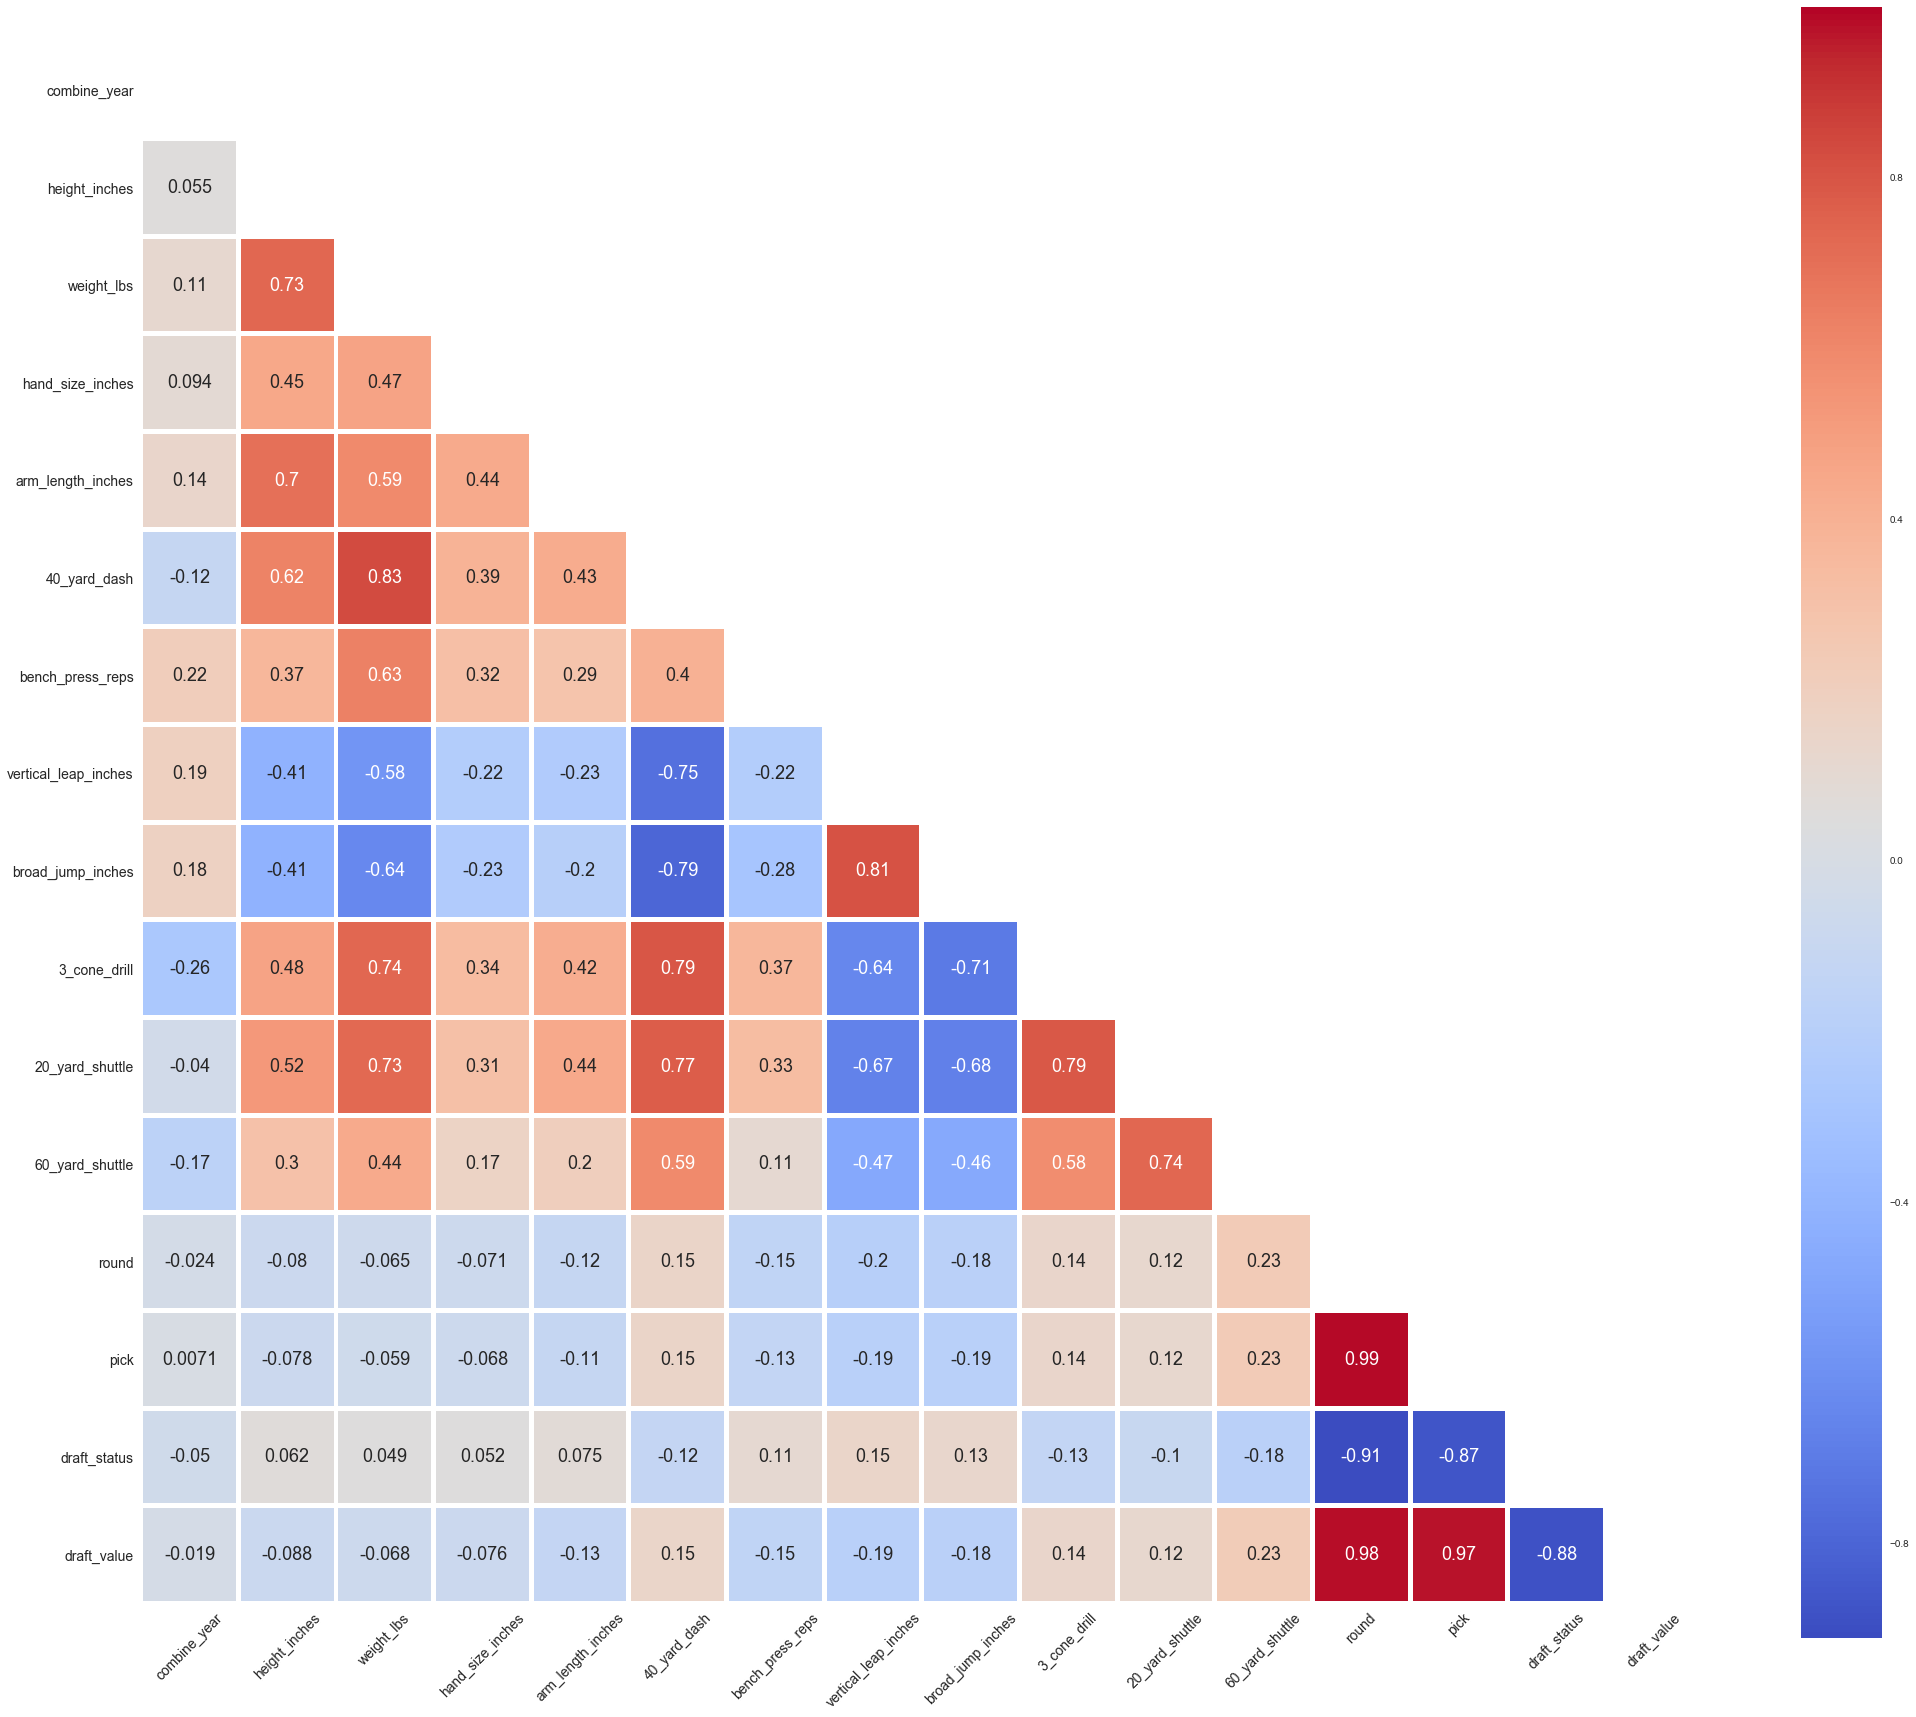

In [23]:
#Correlation Heatmap of all variables in nfl_df dataset

mask = np.zeros_like(nfl_df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(35,30))
ax = sns.heatmap(nfl_df.corr(method='pearson'), cmap="coolwarm", mask=mask, annot=True, annot_kws={"size": 18}, square=True, linewidths=4)
sns.set_style('white')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Distribution of Combine Drills by Position

### Distribution of Draft Status by Position

## Train and Test Dataset Creation



In [ ]:
#Split nfl_df into train and test datasets for our draft_status and draft_value models, using a randomized 80/20 split

#features for all models
features_nfl = nfl_df.iloc[:,6:16]

#train and test datasets for draft_status model
draft_status = nfl_df['draft_status']
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(features_nfl, draft_status, test_size = 0.2, random_state = 10)

#train and test datasets for draft_value model
draft_value = nfl_df['draft_value']
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(features_nfl, draft_value, test_size = 0.2, random_state = 10)

## Data Imputation

### Linear Regression Imputation



## Scaling

### Standard Scaler

## Oversampling

### SMOTE

## Feature Selection

For modeling purposes, we used recursive feature elimination for both our logistic regression model and our simple linear regression model. This process uses cross-validation techniques, using accuracy as a metric, to eliminate variables that may hurt our model performance. Those variables get dropped from the dataset prior to modeling.

### Recursive Feature Elimination for Logistic Regression Model

In [ ]:
# logreg_model = LogisticRegression()
# rfecv_log = RFECV(estimator=logreg_model, step=1, cv=StratifiedKFold(10), scoring='accuracy')
# rfecv_log.fit(x_train_log, y_train_log)

In [ ]:
# feature_importance_log = list(zip(features_log, rfecv_log.support_))
# new_features_log = []
# for key,value in enumerate(feature_importance_log):
#     if(value[1]) == True:
#         new_features_log.append(value[0])
        
# print(new_features_log)

## Final Train and Test Datasets after Feature Selection



In [ ]:
#final train and test datasets for logistic regression model
# x_train_log = x_train_log[new_features_log]
# x_test_log = x_test_log[new_features_log]

# print(x_train_log.shape)
# print(x_test_log.shape)